## Exploring Unsupervised Learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
iris_data = pd.read_csv('Iris.csv')
iris_data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [3]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
iris_data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
iris_data.duplicated().sum()

0

In [6]:
iris_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [7]:
iris_data.Species.value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

Tha data is perfectly balanced.

<AxesSubplot:>

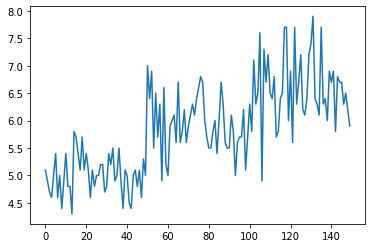

In [9]:
iris_data['SepalLengthCm'].plot(kind = 'line')

<AxesSubplot:xlabel='Species', ylabel='PetalWidthCm'>

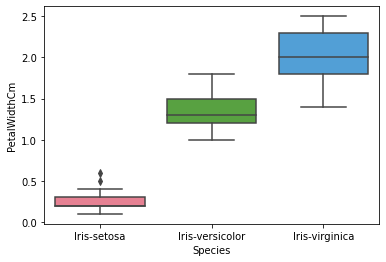

In [17]:
sns.boxplot(x='Species', y='PetalWidthCm', palette = 'husl',data= iris_data)

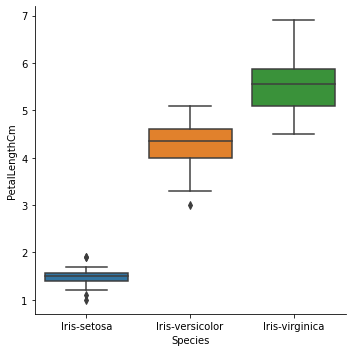

In [28]:
sns.catplot(x='Species', y='PetalLengthCm', kind = 'box',data= iris_data)

<AxesSubplot:xlabel='Species', ylabel='PetalWidthCm'>

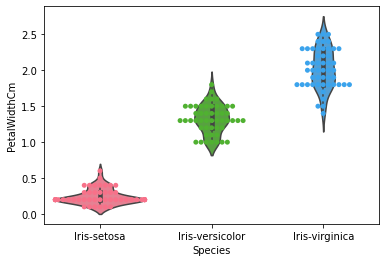

In [31]:
sns.violinplot(x='Species',y='PetalWidthCm',palette = 'husl',data = iris_data)
sns.swarmplot(x='Species',y='PetalWidthCm',palette = 'husl', data = iris_data)

<AxesSubplot:xlabel='Species', ylabel='SepalWidthCm'>

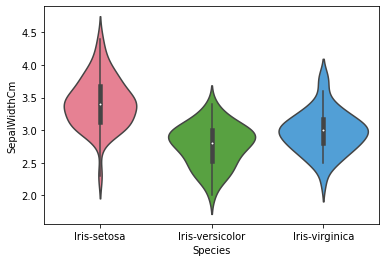

In [32]:
sns.violinplot(x='Species',y='SepalWidthCm',palette = 'husl',data = iris_data)


<AxesSubplot:xlabel='Species', ylabel='SepalLengthCm'>

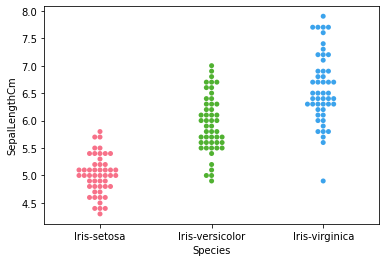

In [33]:
sns.swarmplot(x='Species',y='SepalLengthCm',palette = 'husl', data = iris_data)

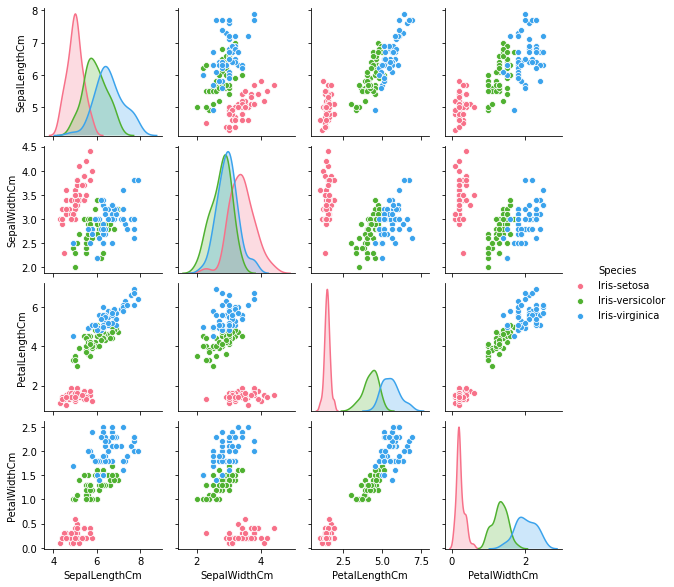

In [15]:
sns.pairplot(iris_data.drop('Id',axis = 1),hue = 'Species',palette='husl',size=2, diag_kind= 'kde')

Text(0.5, 1.0, 'Feature Cluster')

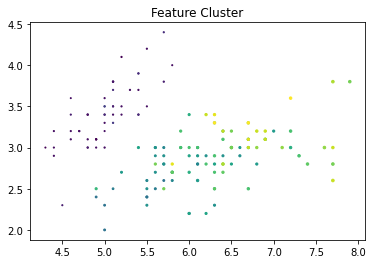

In [26]:
plt.scatter(iris_data['SepalLengthCm'],iris_data['SepalWidthCm'],iris_data['PetalLengthCm'],iris_data['PetalWidthCm'])
plt.title('Feature Cluster')

In [23]:
cor = iris_data.drop('Id',axis = 1).corr()
cor

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

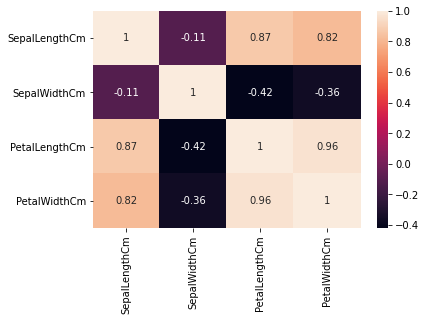

In [24]:
sns.heatmap(cor, annot = True)

In [4]:
x = iris_data.iloc[:, [0, 1, 2, 3]].values

In [27]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    


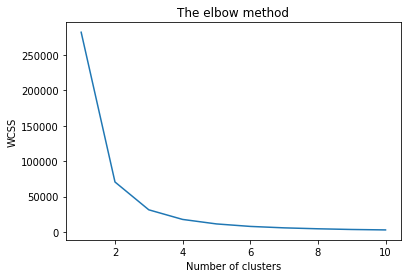

In [28]:
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

In [29]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

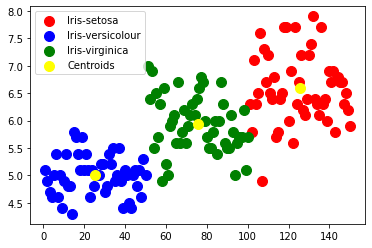

In [30]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()